Ряд распределения:
Возраст: 14, Кол-во: 49
Возраст: 15, Кол-во: 53
Возраст: 16, Кол-во: 236
Возраст: 17, Кол-во: 126
Возраст: 18, Кол-во: 806
Возраст: 19, Кол-во: 971
Возраст: 20, Кол-во: 910
Возраст: 21, Кол-во: 716
Возраст: 22, Кол-во: 944
Возраст: 23, Кол-во: 1071
Возраст: 24, Кол-во: 810
Возраст: 25, Кол-во: 1050
Возраст: 26, Кол-во: 980
Возраст: 27, Кол-во: 1263
Возраст: 28, Кол-во: 1113
Возраст: 29, Кол-во: 1340
Возраст: 30, Кол-во: 734
Возраст: 31, Кол-во: 1115
Возраст: 32, Кол-во: 796
Возраст: 33, Кол-во: 758
Возраст: 34, Кол-во: 869
Возраст: 35, Кол-во: 676
Возраст: 36, Кол-во: 1198
Возраст: 37, Кол-во: 522
Возраст: 38, Кол-во: 1006
Возраст: 39, Кол-во: 695
Возраст: 40, Кол-во: 723
Возраст: 41, Кол-во: 837
Возраст: 42, Кол-во: 978
Возраст: 43, Кол-во: 820
Возраст: 44, Кол-во: 1032
Возраст: 45, Кол-во: 690
Возраст: 46, Кол-во: 677
Возраст: 47, Кол-во: 831
Возраст: 48, Кол-во: 1026
Возраст: 49, Кол-во: 1060
Возраст: 50, Кол-во: 150
Возраст: 51, Кол-во: 188
Возраст: 52, Кол-во: 1

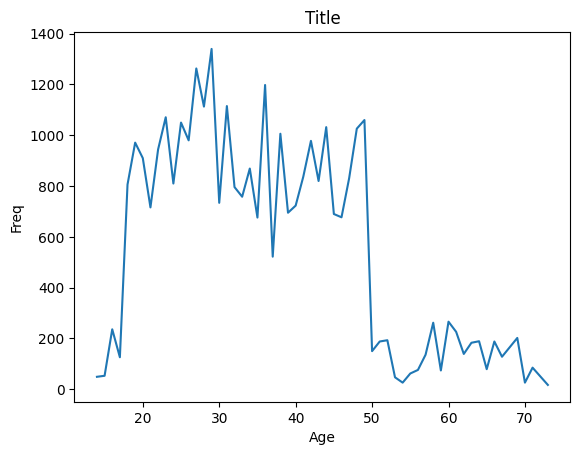

Процент данных +-1 сигмы: 66.35104709619715 %
Процент данных +-2 сигмы: 94.6704499892052 %
Процент данных +-3 сигмы: 99.94756808438454 %


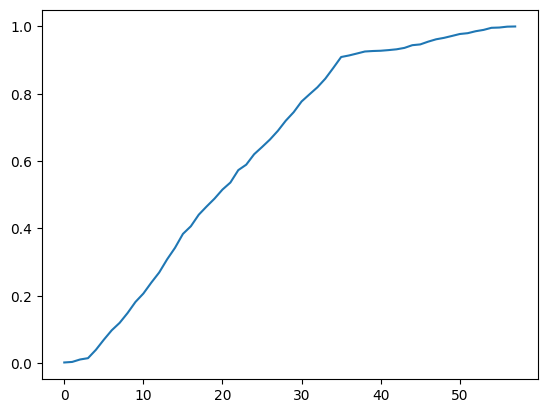

In [1]:
import matplotlib.pyplot as plt
import math as m

file = map(int, open('Москва_2021.txt', 'r').readlines())
b = list(file)

# Первое задание
def first(file):
    a = sorted(set(b))
    print('Ряд распределения:')
    N = 0
    for i in b:
        N += 1
    age = []
    freq = []
    relative_frequency = []
    for i in a:
        age.append(i)
        freq.append(b.count(i))
        relative_frequency.append(b.count(i)/N)
        print(f'Возраст: {i}, Кол-во: {b.count(i)}')
    return age, freq, relative_frequency

# Второе задание
def second(a, b):
    plt.plot(a,b)
    plt.xlabel('Age')
    plt.ylabel('Freq')
    plt.title('Title')
    plt.show()

# Третье задание
def average(unique, frequency):
  sum = 0
  N = 0
  for x, n in zip(unique, frequency):
    comp = x*n
    N += n
    sum += comp
  return sum / N, N

def variance(avg, N):
    a = sum((x - avg) ** 2 for x in b) / N
    return a

def SKO(variance):
  return m.sqrt(variance)

def coef_var(square_deviation, avg):
    return square_deviation/avg * 100

def moda(unique, frequency):
    max = 0
    for i in frequency:
        if (i > max): max = i
    return unique[frequency.index(max)], max

def mediana():
    a = sorted(b)
    if (N % 2 == 0):
        mid = (N // 2 + N//2+1) // 2
        return a[mid]
    else:
        mid = N//2 + 1
        return a[mid]

def maximum():
    return max(b)

def minimum():
    return min(b)

def razmah(max,min):
    return max - min

def Skewness(age, total_average, average_deviation):
  sum2 = 0
  for x in age:
    res = (x - total_average)**3
    sum2 += res
  m3 = sum2 / len(age)
  return m3 / average_deviation**3

# Эксцесс
def Kurtosis(age, total_average, average_deviation):
  sum3 = 0
  for x in age:
    res1 = (x - total_average)**4
    sum3 += res1
  m3 = sum3 / len(age)
  return m3 / average_deviation**4 - 3




unique, frequency, relative_frequency = first(file)
avg, N = average(unique, frequency)
print(f'Средняя: {avg}')
print(f'Объем генеральной совокупности: {N}')
variance = variance(avg, N)
print(f'Дисперия: {variance}')
square_deviation = SKO(variance)
print(f"Среднее квадратическое отклонение: {square_deviation}")
coef_var = coef_var(square_deviation, avg)
print(f'Коэффициент вариации: {coef_var}')
moda, freq_moda = moda(unique,frequency)
print(f'Мода: {moda}, частота моды: {freq_moda}')
mediana = mediana()
print(f'Медиана: {mediana}')
max = maximum()
print(f'Максимальное: {max}')
min = minimum()
print(f'Минимальное: {min}')
print(f'Размах: {razmah(max,min)}')
Skewness = round(Skewness(b, avg, square_deviation), 6)
print(f"Асимметрия: {Skewness}")
kurtosis = round(Kurtosis(b, avg, square_deviation), 6)
print(f"Эксцесс: {kurtosis}")

second(unique,frequency)

# Задание 4: Правило 3-х сигм

for k in range(1, 4):
  lower = avg - k*square_deviation # нижняя граница
  upper = avg + k*square_deviation # верхняя граница
  count = 0

  for x in b:
    if lower < x < upper:
      count += 1
  percent = (count*100)/N
  print(f"Процент данных +-{k} сигмы: {percent}", "%")

# Задание 5: Построить графически статистическую функцию распределения

cumulative = {}
sum4 = 0
for i in range(len(relative_frequency)):
    sum4 += relative_frequency[i]
    cumulative[i] = sum4

plt.plot(cumulative.keys(), cumulative.values())
plt.show()